Part 1

<img src = 'alex_architecture.png'>

1. Convolution layers are useful for extracting certain features from an image using filters. The layer learns multiple features in parallel for a given input and use them to classify images.


<img src='max_pool.gif'>

2. Pooling layers are used to down sample the detection of features in feature maps.

 3. BatchNormalization layers are used to normalize the data to avoid overfitting.

4. Flatten layer flattens the multi-dimensional input into 1-dimensional input so that it can be fed into a fully connected dense layers.


5. Fully connected layers connect every input neuron to every output neuron.

6. Stride is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video.


7. Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN.

<img src = 'Padding_stride.gif'>

In [1]:
#Defining  AlexNet
#Importing library
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [1]:
#Reading Data
import pickle

with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [2]:
#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Part 2

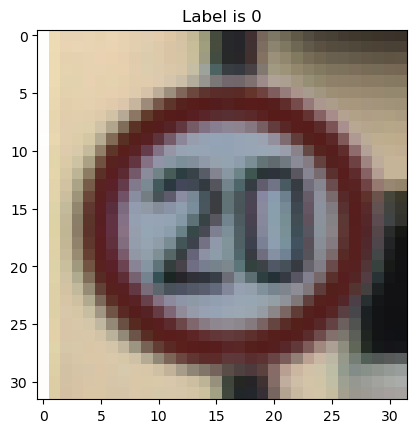

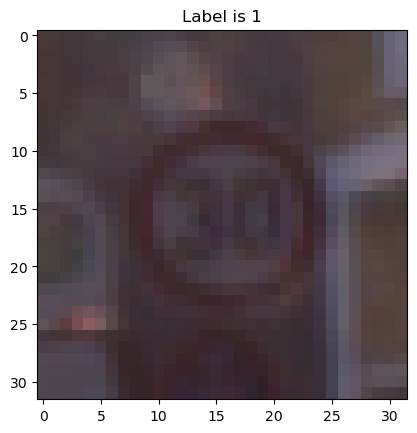

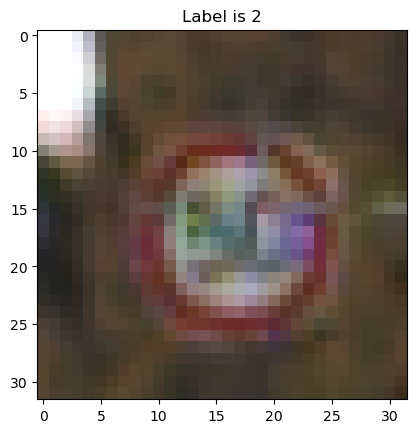

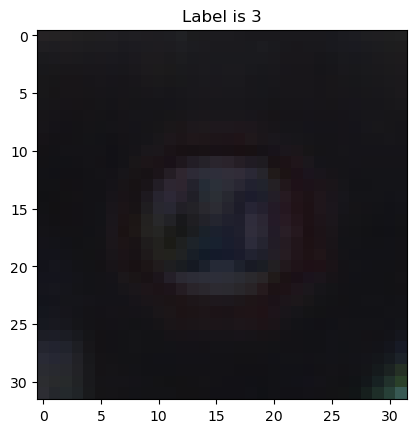

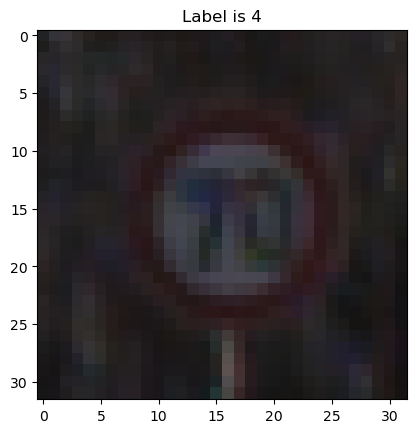

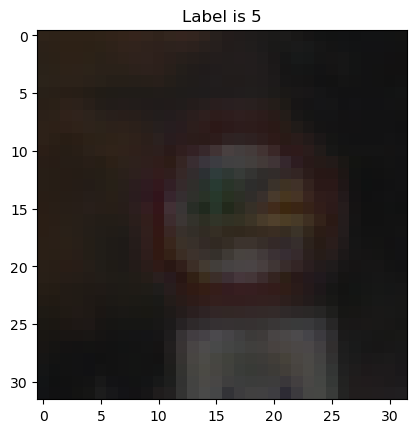

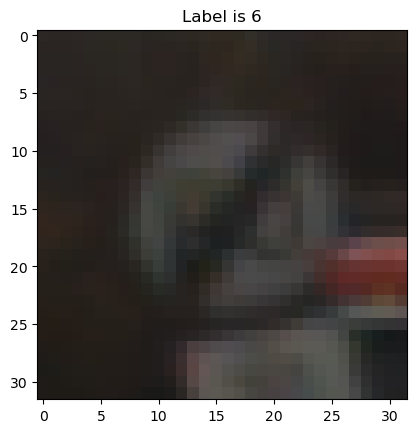

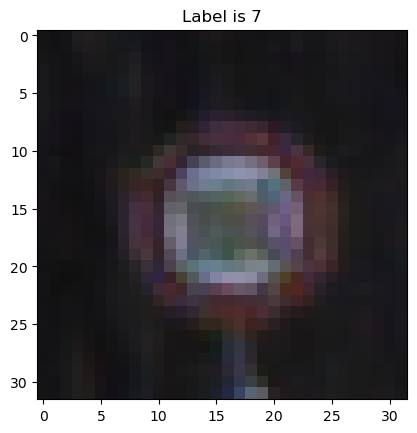

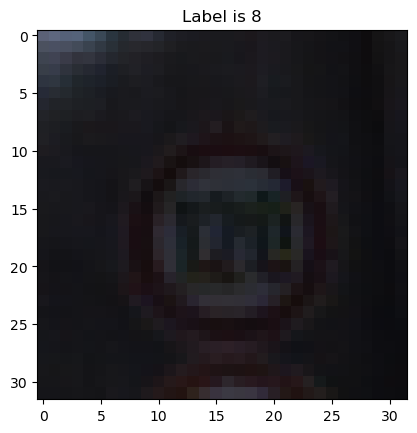

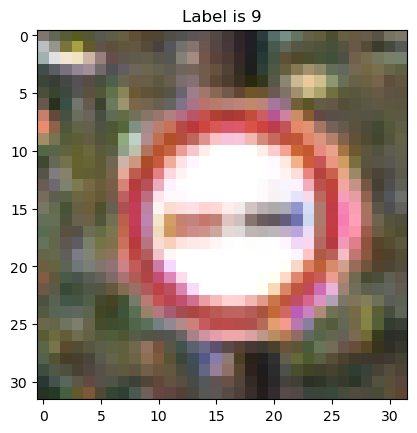

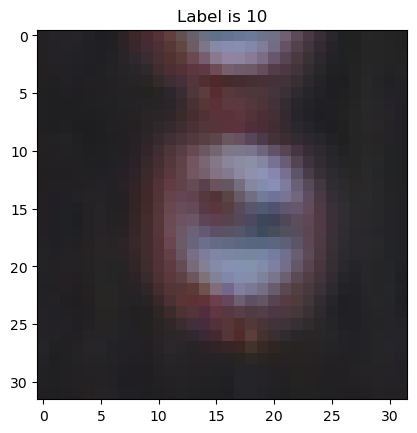

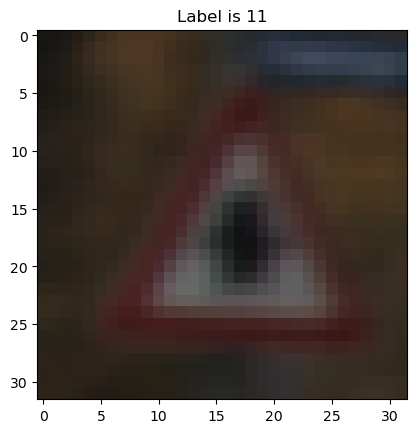

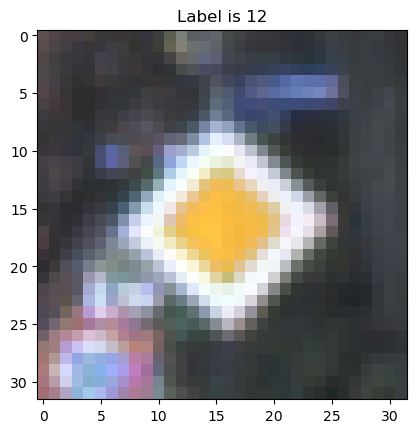

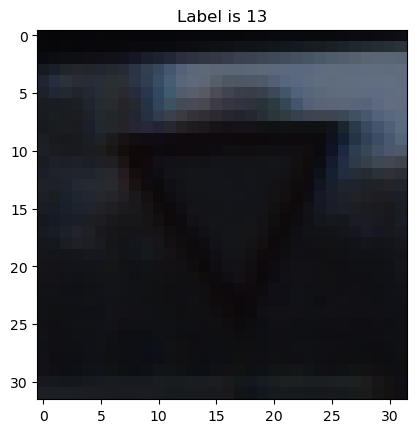

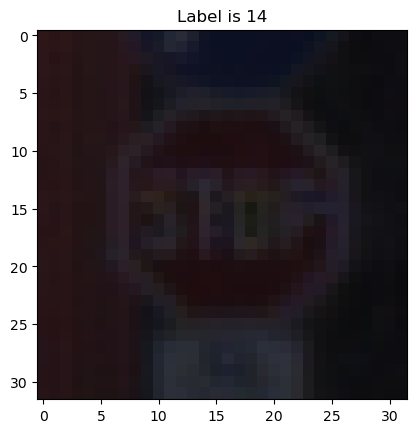

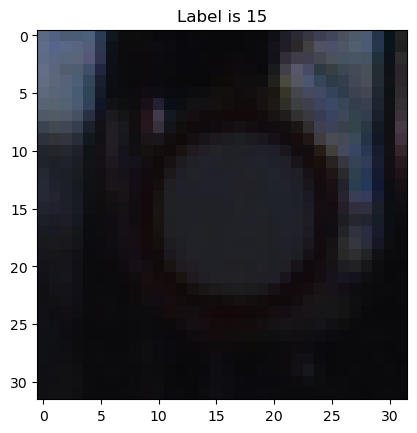

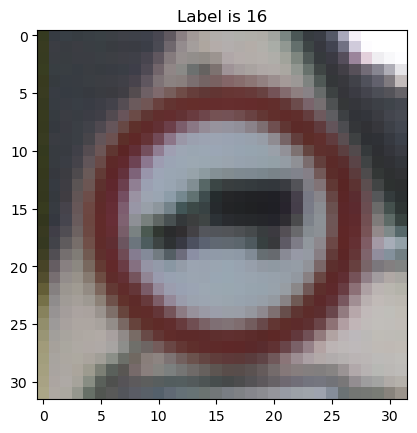

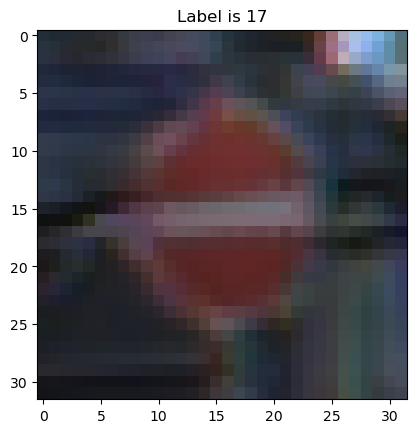

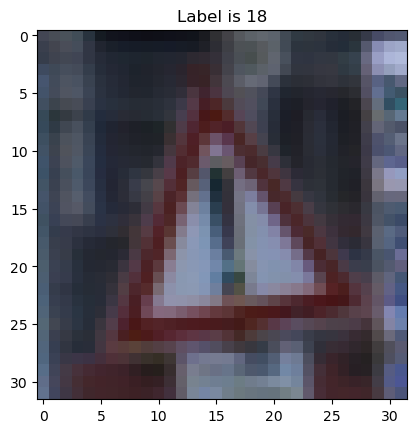

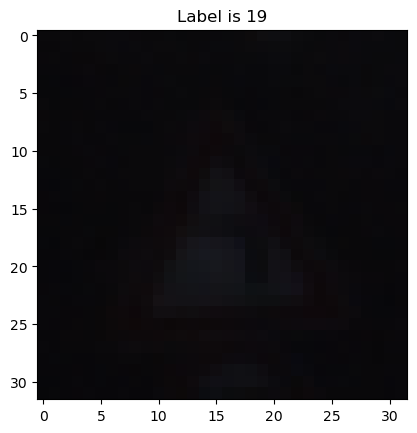

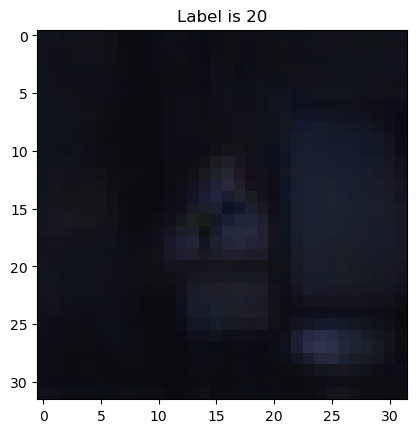

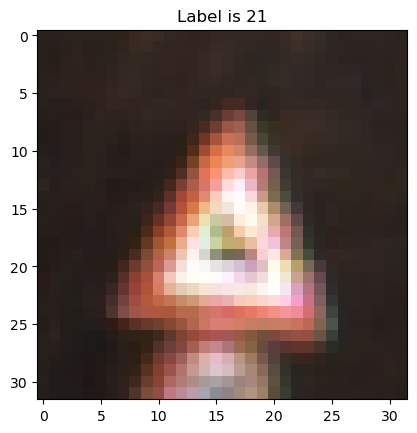

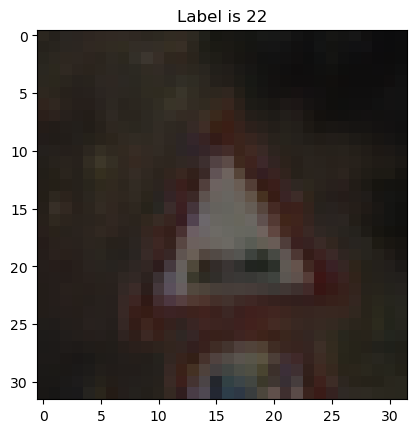

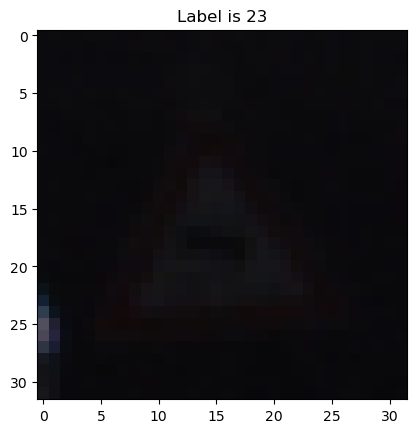

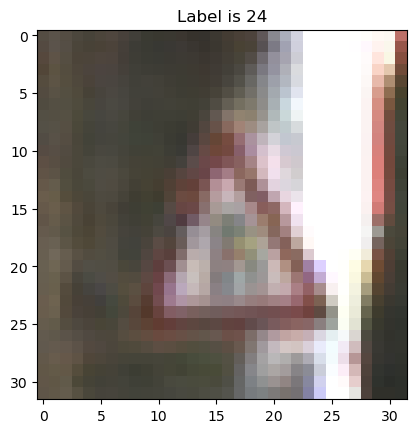

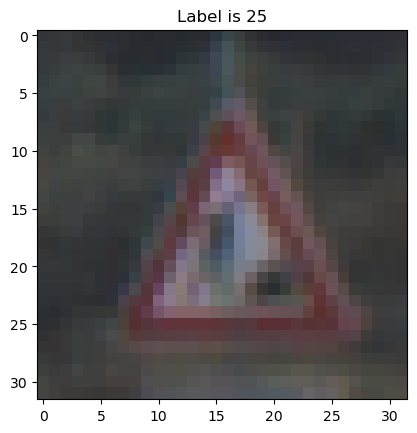

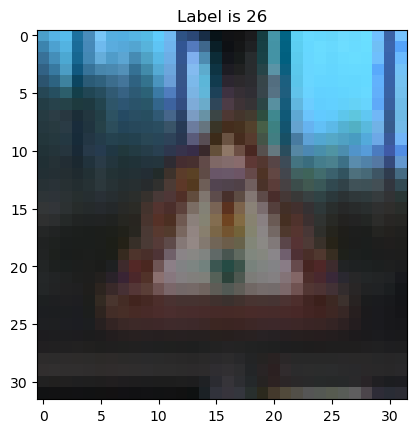

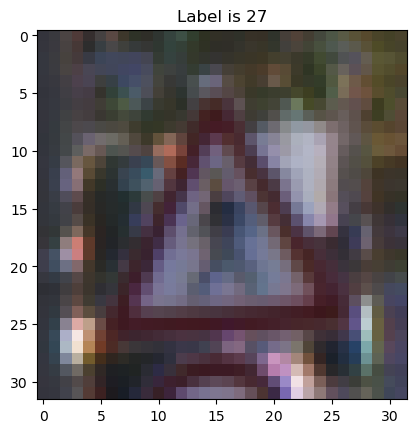

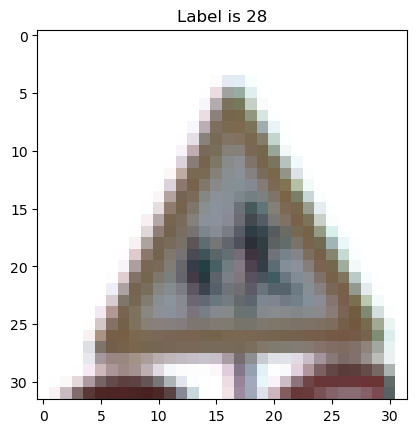

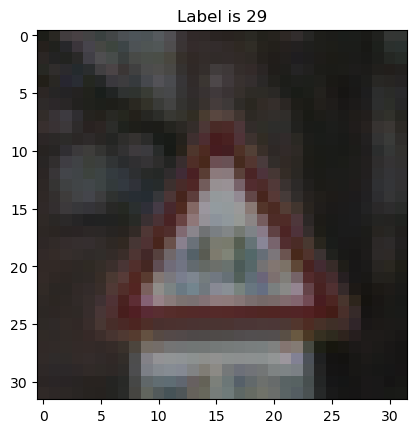

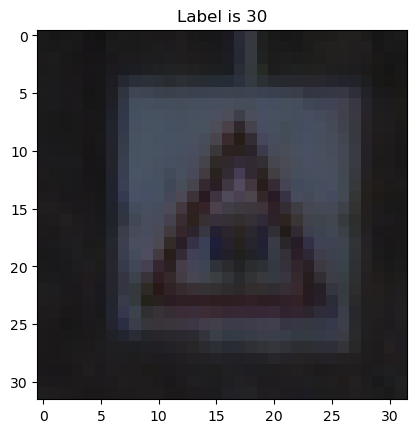

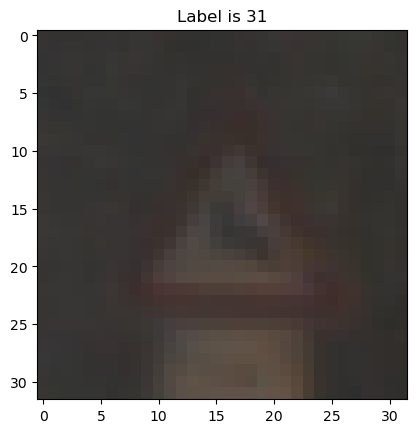

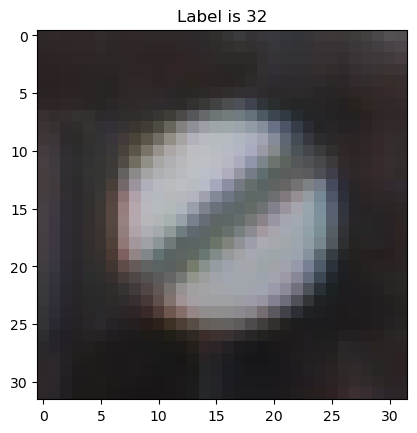

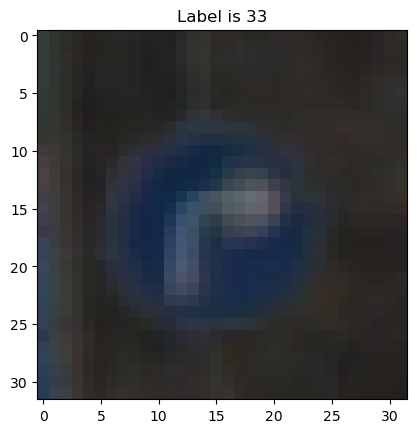

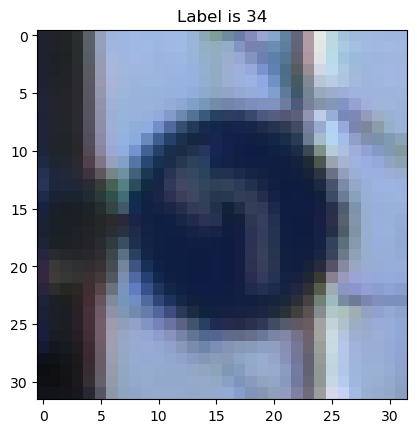

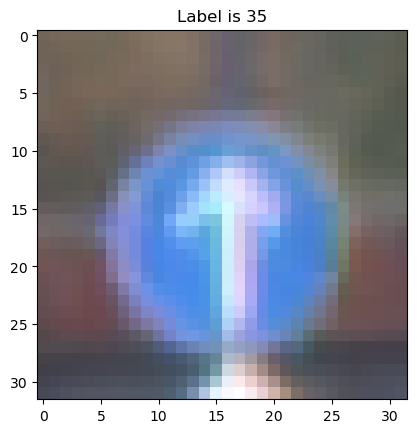

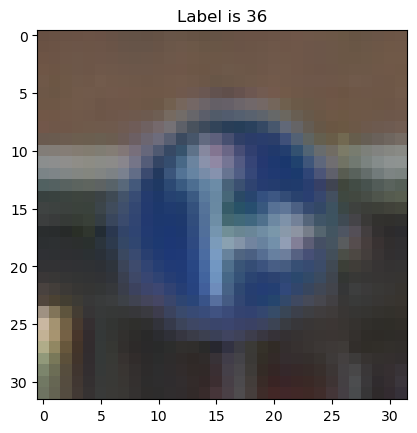

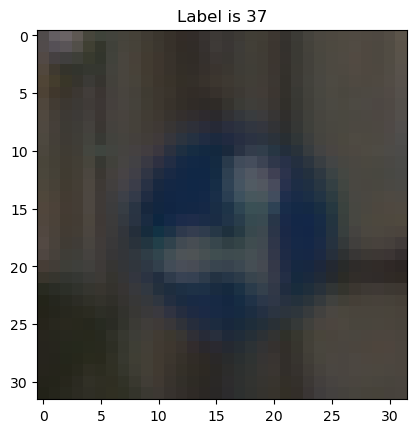

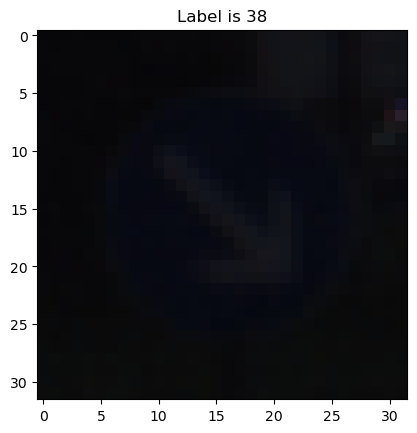

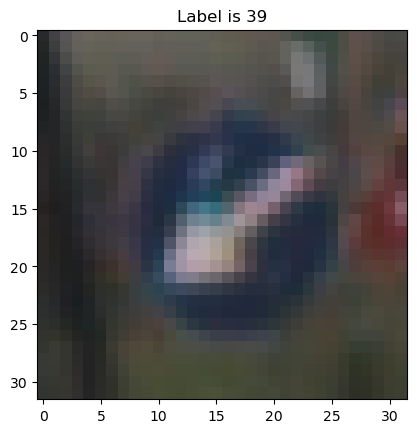

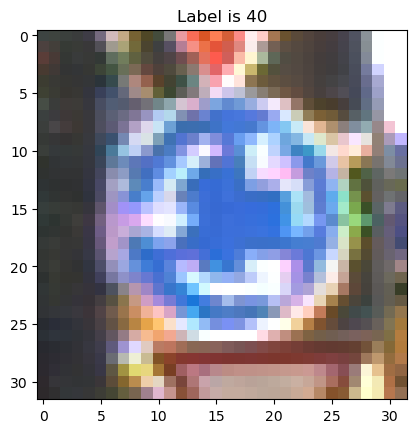

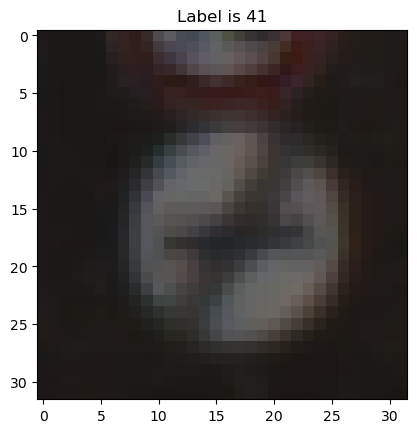

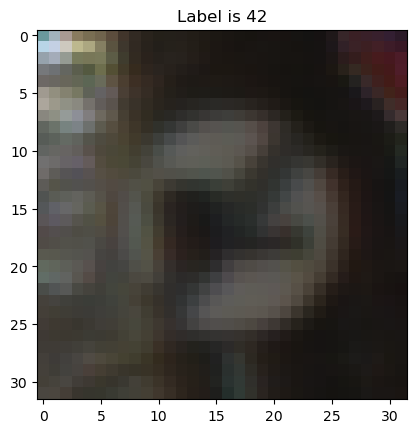

In [5]:
import numpy as np
import matplotlib.pyplot as plt
lab, ind = np.unique(y_train,  return_index = True)
import time
for i in ind:
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label is '+str(y_train[i]))
    plt.show()
    time.sleep(0.2)

In [6]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_train.shape

(34799, 32, 32, 3)

In [7]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 
X_train_gray.shape

(34799, 32, 32, 1)

In [7]:
X_train_gray_norm = (X_train_gray - 32)/32 
X_test_gray_norm = (X_test_gray - 32)/32
X_validation_gray_norm = (X_validation_gray - 32)/32

In [8]:
#Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

y_train_unchanged = y_train
y_validation_unchanged = y_validation
y_test_unchanged = y_test

#Since we have 43 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 43
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
X_validation.shape

(4410, 32, 32, 3)

In [11]:
X_test.shape

(12630, 32, 32, 3)

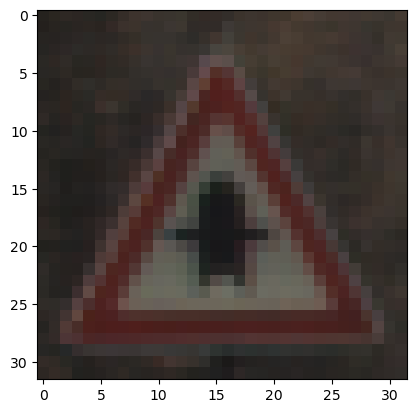

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_test[4], cmap='gray')

In [13]:
y_test[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Part 3

In [14]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])
history = AlexNet.fit(X_train_gray_norm, y_train, epochs = 15, validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/15
1088/1088 [==============================] - 13s 8ms/step - loss: 2.5578 - accuracy: 0.3537 - val_loss: 1.9337 - val_accuracy: 0.4841
Epoch 2/15
1088/1088 [==============================] - 10s 9ms/step - loss: 1.2037 - accuracy: 0.7086 - val_loss: 1.6918 - val_accuracy: 0.5528
Epoch 3/15
1088/1088 [==============================] - 10s 9ms/step - loss: 0.7979 - accuracy: 0.8118 - val_loss: 1.0299 - val_accuracy: 0.7317
Epoch 4/15
1088/1088 [==============================] - 9s 9ms/step - loss: 0.5858 - accuracy: 0.8662 - val_loss: 1.0289 - val_accuracy: 0.7365
Epoch 5/15
1088/1088 [==============================] - 9s 8ms/step - loss: 0.4543 - accuracy: 0.9005 - val_loss: 1.1087 - val_accuracy: 0.7238
Epoch 6/15
1088/1088 [==============================] - 9s 8ms/step - loss: 0.3658 - accuracy: 0.9212 - val_loss: 0.9423 - val_accuracy: 0.7576
Epoch 7/15
1088/1088 [==============================] - 9s 8ms/step - loss: 0.3036 - accuracy: 0.9365 - val_loss: 1.1150 - val_accura

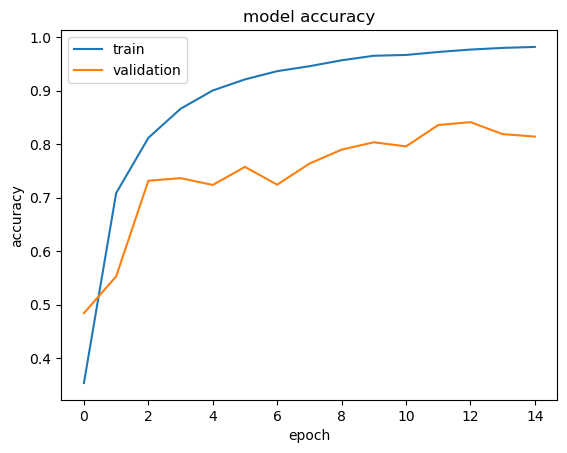

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Part 4

In [16]:
AlexNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.6535 - accuracy: 0.8380


[0.6535311937332153, 0.8380047678947449]

Part 5

(212, 32, 32, 1)
(212, 43)
(91, 32, 32, 1)
(91, 43)
Epoch 1/15
1095/1095 [==============================] - 10s 9ms/step - loss: 0.1176 - accuracy: 0.9785 - val_loss: 1.1215 - val_accuracy: 0.7417
Epoch 2/15
1095/1095 [==============================] - 9s 8ms/step - loss: 0.1072 - accuracy: 0.9799 - val_loss: 0.7620 - val_accuracy: 0.7955
Epoch 3/15
1095/1095 [==============================] - 9s 8ms/step - loss: 0.0989 - accuracy: 0.9816 - val_loss: 1.1748 - val_accuracy: 0.7025
Epoch 4/15
1095/1095 [==============================] - 9s 8ms/step - loss: 0.0892 - accuracy: 0.9837 - val_loss: 1.0808 - val_accuracy: 0.7245
Epoch 5/15
1095/1095 [==============================] - 9s 8ms/step - loss: 0.0848 - accuracy: 0.9839 - val_loss: 2.4133 - val_accuracy: 0.4512
Epoch 6/15
1095/1095 [==============================] - 9s 9ms/step - loss: 0.0854 - accuracy: 0.9843 - val_loss: 0.9340 - val_accuracy: 0.7707
Epoch 7/15
1095/1095 [==============================] - 10s 9ms/step - loss: 0.0718

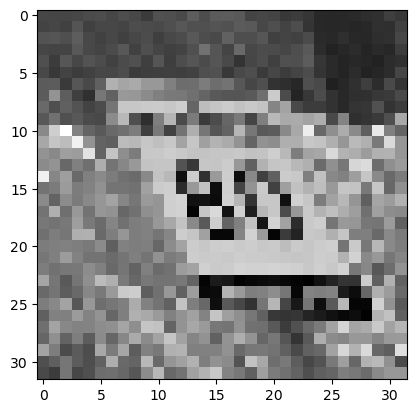

In [17]:
#Adding additional data for fine tuning
#Adding additional data for fine tuning

from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
p = Path().cwd()
q = p/"traffic-sig-new-data"  # use p to create a path to the data 

target_dict = { '0':  0,  '1': 1,   '2': 2,   '3':  3,  '4':  4,  '5':  5,  '6':  6,  '7':  7,  '8':  8,  '9':  9, 
               '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19,
               '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29,
               '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39,
               '40': 40, '41': 41, '42': 42} # create dictionary mapping you data classes/labels to integer labels 

images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label 
    for img in fldr.iterdir():
      img = load_img(img, color_mode = "grayscale") # load image as grayscale  
      img_array = img_to_array(img) # convert the image to an NumPy array 
      img_array_resized = smart_resize(img_array, size = (32,32)) # resize the image to 32 by 32 
      images.append(img_array_resized) # add reshaped image to list of images 
      labels.append(current_label) # add label for this image to the list of labels
 

new_images = np.array(images) # convert the list of images to a NumPy array 
new_labels = np.array(labels) # convert the list of labels to a NumPy array

## Shuffle the dataset 
new_images, new_labels = shuffle(new_images, new_labels)

# use plt.imshow() to view a few of the grayscale images
i = 18
plt.imshow(new_images[i].squeeze(), cmap='gray')

new_labels1 = [target_dict.get(e, e) for e in new_labels] # use the target_dict to convert the string labels to an array of integers
new_labels1 = np.array(new_labels1) # convert the list of int labels to a NumPy array

# Since we have 43 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 43
new_labels1=to_categorical(new_labels1)

from sklearn.model_selection import train_test_split
# Splitting the new images in 70% for training, 30% for testing
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_images, new_labels1, test_size=0.3, random_state=42) 
print(new_X_train.shape)
print(new_y_train.shape)

print(new_X_test.shape)
print(new_y_test.shape)

new_X_train = new_X_train.astype('float32') / 255
new_X_test = new_X_test.astype('float32') / 255

#joining the data

all_X_train = np.concatenate((X_train_gray_norm,new_X_train),axis=0) 

all_y_train = np.concatenate( (y_train, new_y_train), axis = 0)

history = AlexNet.fit(all_X_train, all_y_train, epochs = 40, validation_data = (X_validation_gray_norm, y_validation))

In [18]:
AlexNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.8558 - accuracy: 0.8065


[0.8558304309844971, 0.8064925074577332]

Part 6


In [19]:
# initialize a dictionary to store the class weights
classTotals = y_train.sum(axis=0)
classWeight = dict()
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]
    
#training previous model and changing hyperparameters
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 30)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          11712     
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_9 (Activation)    (None, 4, 4, 256)        

In [20]:
from tensorflow.keras.optimizers import Adam
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [21]:
history = AlexNet.fit(X_train_gray_norm, y_train, epochs = 150, validation_data = (X_validation_gray_norm, y_validation), callbacks = [stop, mc], batch_size = 500)

Epoch 1/150
70/70 [==============================] - 5s 46ms/step - loss: 3.3910 - accuracy: 0.1448 - val_loss: 3.7303 - val_accuracy: 0.0544

Epoch 00001: val_loss improved from inf to 3.73028, saving model to best_model.h5
Epoch 2/150
70/70 [==============================] - 2s 27ms/step - loss: 2.5616 - accuracy: 0.3785 - val_loss: 3.6218 - val_accuracy: 0.0830

Epoch 00002: val_loss improved from 3.73028 to 3.62175, saving model to best_model.h5
Epoch 3/150
70/70 [==============================] - 2s 27ms/step - loss: 2.0676 - accuracy: 0.5436 - val_loss: 3.3478 - val_accuracy: 0.2469

Epoch 00003: val_loss improved from 3.62175 to 3.34782, saving model to best_model.h5
Epoch 4/150
70/70 [==============================] - 2s 27ms/step - loss: 1.7261 - accuracy: 0.6469 - val_loss: 2.8287 - val_accuracy: 0.3832

Epoch 00004: val_loss improved from 3.34782 to 2.82871, saving model to best_model.h5
Epoch 5/150
70/70 [==============================] - 2s 27ms/step - loss: 1.4486 - accur

Epoch 80/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0277 - accuracy: 0.9997 - val_loss: 0.7249 - val_accuracy: 0.8193

Epoch 00080: val_loss did not improve from 0.67396
Epoch 81/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0271 - accuracy: 0.9998 - val_loss: 0.6850 - val_accuracy: 0.8268

Epoch 00081: val_loss did not improve from 0.67396
Epoch 82/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0272 - accuracy: 0.9998 - val_loss: 0.6994 - val_accuracy: 0.8243

Epoch 00082: val_loss did not improve from 0.67396
Epoch 83/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0256 - accuracy: 0.9999 - val_loss: 0.6879 - val_accuracy: 0.8238

Epoch 00083: val_loss did not improve from 0.67396
Epoch 84/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0258 - accuracy: 0.9999 - val_loss: 0.6878 - val_accuracy: 0.8249

Epoch 00084: val_loss did not improve from 0.67396
Epoch 85/150
70/70 [=====

In [22]:
best_AlexNet = load_model('best_model.h5')

In [23]:
best_AlexNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.6084 - accuracy: 0.8452


[0.6083579063415527, 0.8452098369598389]

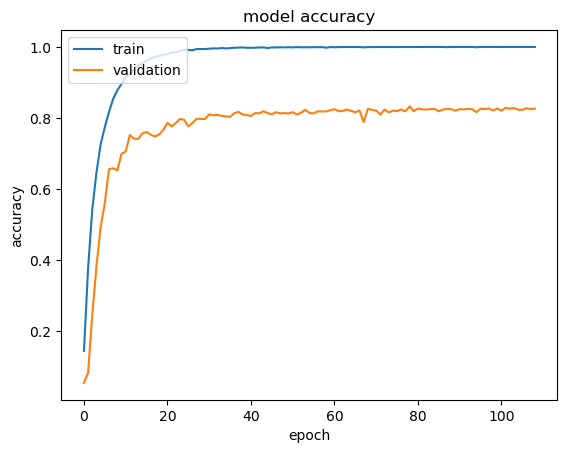

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Part 7

In [25]:
from tensorflow.keras.applications import ResNet50
import tensorflow
import tensorflow.keras as K
res = ResNet50(include_top = False, weights = 'imagenet', input_shape = (32, 32, 3))
model = K.models.Sequential()
model.add(res)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(learning_rate=0.001), metrics=['accuracy'])
stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 30)
mc = ModelCheckpoint('best_res.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [27]:
from tensorflow.keras.applications.resnet50 import preprocess_input
#X_train = preprocess_input(X_train)
#X_validation = preprocess_input(X_validation)
#X_test = preprocess_input(X_test)

In [28]:
history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_validation, y_validation), class_weight=classWeight, callbacks = [stop, mc], batch_size = 500)

Epoch 1/150
70/70 [==============================] - 18s 146ms/step - loss: 9.1874 - accuracy: 0.0674 - val_loss: 7.0135 - val_accuracy: 0.1322

Epoch 00001: val_loss improved from inf to 7.01352, saving model to best_res.h5


C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/150
70/70 [==============================] - 7s 103ms/step - loss: 6.6240 - accuracy: 0.2466 - val_loss: 3.0428 - val_accuracy: 0.2186

Epoch 00002: val_loss improved from 7.01352 to 3.04280, saving model to best_res.h5
Epoch 3/150
70/70 [==============================] - 7s 105ms/step - loss: 4.4056 - accuracy: 0.4839 - val_loss: 1.3817 - val_accuracy: 0.6905

Epoch 00003: val_loss improved from 3.04280 to 1.38167, saving model to best_res.h5
Epoch 4/150
70/70 [==============================] - 7s 102ms/step - loss: 3.0015 - accuracy: 0.6517 - val_loss: 1.0366 - val_accuracy: 0.7528

Epoch 00004: val_loss improved from 1.38167 to 1.03665, saving model to best_res.h5
Epoch 5/150
70/70 [==============================] - 7s 102ms/step - loss: 2.0847 - accuracy: 0.7851 - val_loss: 0.8847 - val_accuracy: 0.8077

Epoch 00005: val_loss improved from 1.03665 to 0.88466, saving model to best_res.h5
Epoch 6/150
70/70 [==============================] - 7s 102ms/step - loss: 1.6006 - accu

70/70 [==============================] - 7s 101ms/step - loss: 0.1231 - accuracy: 0.9899 - val_loss: 0.5835 - val_accuracy: 0.9249

Epoch 00042: val_loss did not improve from 0.28061
Epoch 43/150
70/70 [==============================] - 7s 102ms/step - loss: 0.1247 - accuracy: 0.9901 - val_loss: 0.3429 - val_accuracy: 0.9556

Epoch 00043: val_loss did not improve from 0.28061
Epoch 44/150
70/70 [==============================] - 7s 102ms/step - loss: 0.1140 - accuracy: 0.9903 - val_loss: 0.3278 - val_accuracy: 0.9605

Epoch 00044: val_loss did not improve from 0.28061
Epoch 45/150
70/70 [==============================] - 7s 102ms/step - loss: 0.0987 - accuracy: 0.9914 - val_loss: 0.2989 - val_accuracy: 0.9646

Epoch 00045: val_loss did not improve from 0.28061
Epoch 46/150
70/70 [==============================] - 7s 102ms/step - loss: 0.1068 - accuracy: 0.9909 - val_loss: 0.3351 - val_accuracy: 0.9619

Epoch 00046: val_loss did not improve from 0.28061
Epoch 47/150
70/70 [=============

In [29]:
best_ResNet = load_model('best_res.h5')

In [30]:
best_ResNet.evaluate(X_test, y_test)

395/395 [==============================] - 5s 9ms/step - loss: 0.3542 - accuracy: 0.9500


[0.35420605540275574, 0.9500395655632019]

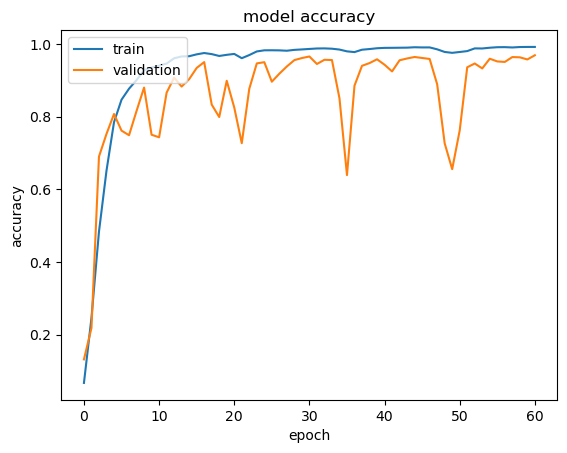

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
from tensorflow.keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=43, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 256)        

In [41]:
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 30)
mc = ModelCheckpoint('best_vgg.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [42]:
#from tensorflow.keras.applications.vgg19 import preprocess_input
#X_train = preprocess_input(X_train)
#X_validation = preprocess_input(X_validation)
#X_test = preprocess_input(X_test)

In [43]:
history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_validation, y_validation), callbacks = [stop, mc], class_weight=classWeight, batch_size = 500)

Epoch 1/150
70/70 [==============================] - 9s 116ms/step - loss: 9.2611 - accuracy: 0.0290 - val_loss: 3.6979 - val_accuracy: 0.0444

Epoch 00001: val_loss improved from inf to 3.69789, saving model to best_vgg.h5
Epoch 2/150
70/70 [==============================] - 8s 112ms/step - loss: 9.1004 - accuracy: 0.0306 - val_loss: 3.5567 - val_accuracy: 0.0474

Epoch 00002: val_loss improved from 3.69789 to 3.55674, saving model to best_vgg.h5
Epoch 3/150
70/70 [==============================] - 8s 112ms/step - loss: 8.7210 - accuracy: 0.0517 - val_loss: 3.2344 - val_accuracy: 0.1279

Epoch 00003: val_loss improved from 3.55674 to 3.23438, saving model to best_vgg.h5
Epoch 4/150
70/70 [==============================] - 8s 113ms/step - loss: 7.6812 - accuracy: 0.1463 - val_loss: 2.8409 - val_accuracy: 0.2125

Epoch 00004: val_loss improved from 3.23438 to 2.84091, saving model to best_vgg.h5
Epoch 5/150
70/70 [==============================] - 8s 112ms/step - loss: 6.4647 - accuracy

In [44]:
from tensorflow.keras.models import load_model
best_VGG = load_model('best_vgg.h5')

In [45]:
best_VGG.evaluate(X_test, y_test)

395/395 [==============================] - 15s 36ms/step - loss: 0.9224 - accuracy: 0.8511


[0.9224259257316589, 0.8510688543319702]

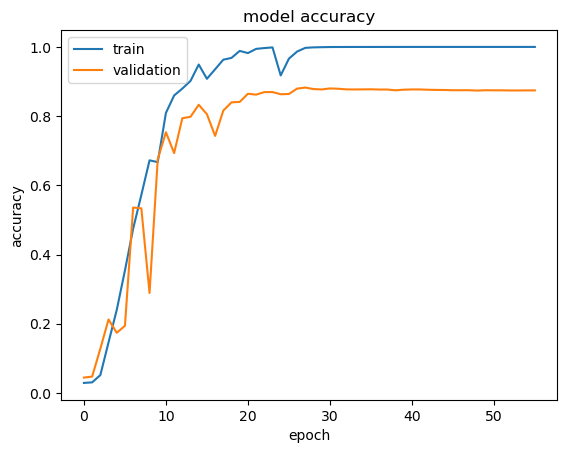

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)         

In [59]:
stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 30)
mc = ModelCheckpoint('best_our_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [60]:
# Compile metrics
model.compile(loss ='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics =['accuracy'])

In [61]:
history = model.fit(X_train_gray_norm, y_train,
          batch_size=500,
          epochs=150,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True, callbacks = [stop, mc])

Epoch 1/150
70/70 [==============================] - 2s 29ms/step - loss: 3.2860 - accuracy: 0.1272 - val_loss: 2.2053 - val_accuracy: 0.4220

Epoch 00001: val_loss improved from inf to 2.20528, saving model to best_our_model.h5
Epoch 2/150
70/70 [==============================] - 2s 27ms/step - loss: 1.3150 - accuracy: 0.6200 - val_loss: 0.5091 - val_accuracy: 0.8537

Epoch 00002: val_loss improved from 2.20528 to 0.50909, saving model to best_our_model.h5
Epoch 3/150
70/70 [==============================] - 2s 26ms/step - loss: 0.4575 - accuracy: 0.8601 - val_loss: 0.2418 - val_accuracy: 0.9256

Epoch 00003: val_loss improved from 0.50909 to 0.24179, saving model to best_our_model.h5
Epoch 4/150
70/70 [==============================] - 2s 26ms/step - loss: 0.2360 - accuracy: 0.9253 - val_loss: 0.1645 - val_accuracy: 0.9560

Epoch 00004: val_loss improved from 0.24179 to 0.16446, saving model to best_our_model.h5
Epoch 5/150
70/70 [==============================] - 2s 26ms/step - loss


Epoch 00040: val_loss did not improve from 0.05017
Epoch 41/150
70/70 [==============================] - 2s 26ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0541 - val_accuracy: 0.9871

Epoch 00041: val_loss did not improve from 0.05017
Epoch 42/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0769 - val_accuracy: 0.9841

Epoch 00042: val_loss did not improve from 0.05017
Epoch 43/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0645 - val_accuracy: 0.9848

Epoch 00043: val_loss did not improve from 0.05017
Epoch 44/150
70/70 [==============================] - 2s 29ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0557 - val_accuracy: 0.9834

Epoch 00044: val_loss did not improve from 0.05017
Epoch 45/150
70/70 [==============================] - 2s 29ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0571 - val_accuracy: 0.9875

Epoch 00045: val_loss di

70/70 [==============================] - 2s 26ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0390 - val_accuracy: 0.9909

Epoch 00123: val_loss did not improve from 0.03280
Epoch 124/150
70/70 [==============================] - 2s 26ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0388 - val_accuracy: 0.9916

Epoch 00124: val_loss did not improve from 0.03280
Epoch 125/150
70/70 [==============================] - 2s 27ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0433 - val_accuracy: 0.9909

Epoch 00125: val_loss did not improve from 0.03280
Epoch 126/150
70/70 [==============================] - 2s 26ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0400 - val_accuracy: 0.9900

Epoch 00126: val_loss did not improve from 0.03280
Epoch 127/150
70/70 [==============================] - 2s 26ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0537 - val_accuracy: 0.9878

Epoch 00127: val_loss did not improve from 0.03280
Epoch 128/150
70/70 [=============

In [62]:
from tensorflow.keras.models import load_model
best_model = load_model('best_our_model.h5')

In [64]:
model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 2ms/step - loss: 0.1390 - accuracy: 0.9774


[0.1390485018491745, 0.9774346947669983]

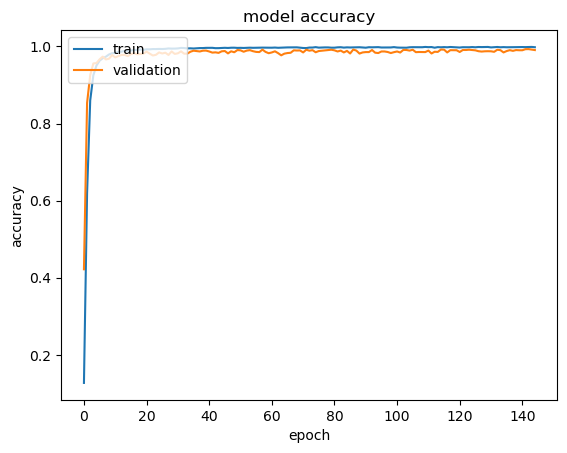

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

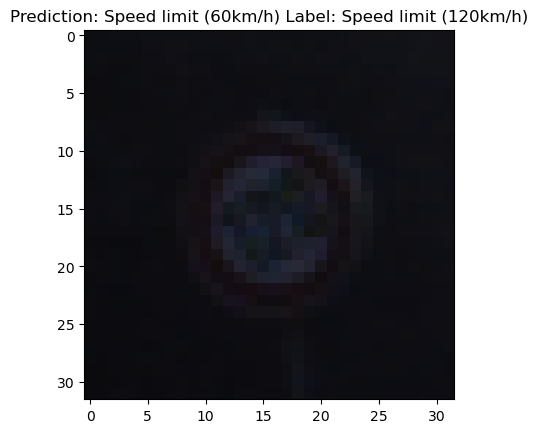

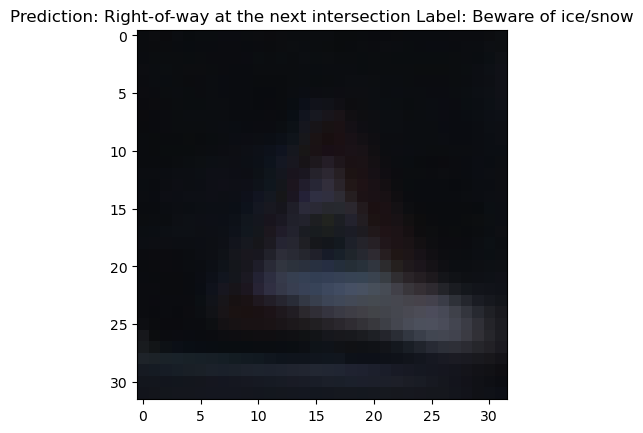

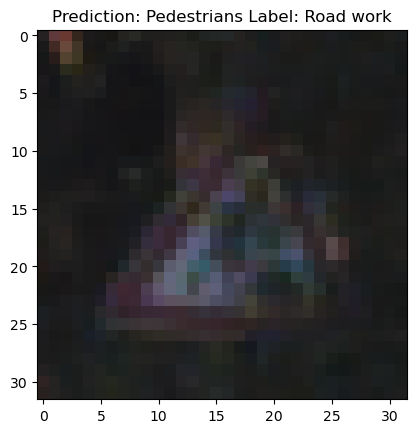

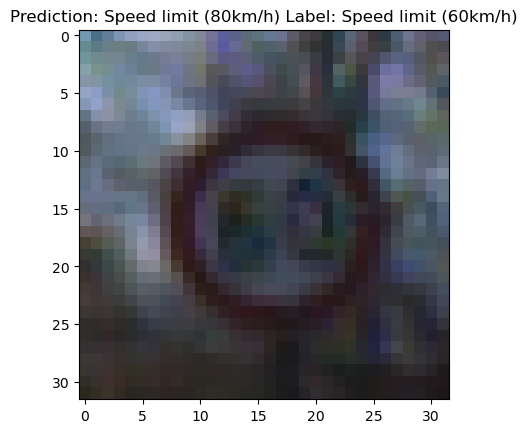

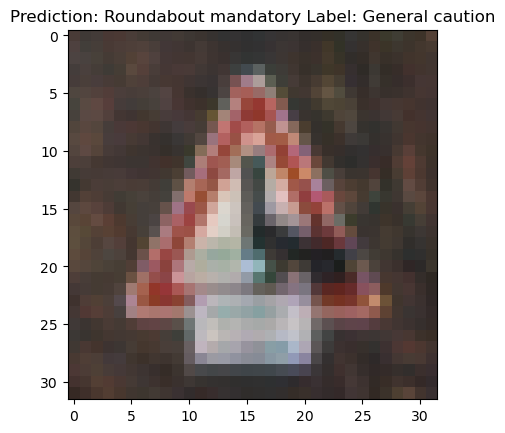

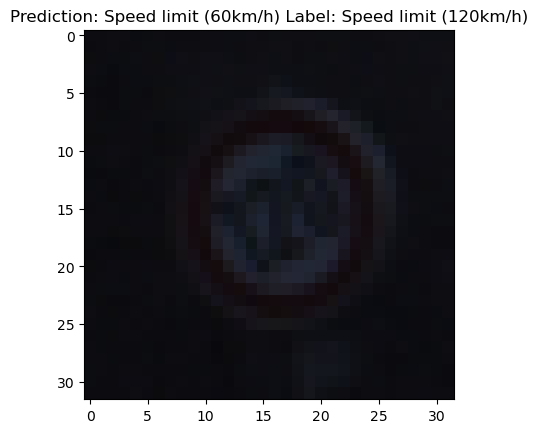

In [182]:
classes_file = open("traffic_classes.txt", "r")
classes = ast.literal_eval(classes_file.read())
classes_file.close()

#get the predictions for the test data
predict_x = model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)
for i in range(0,300):
    current_label = np.argmax(y_test[i])
    current_prediction = predicted_classes[i]
    if (current_label != current_prediction):
        plt.title('Prediction: %s Label: %s' % (classes[current_prediction], classes[current_label]))
        plt.imshow(X_test[i])
        plt.show()

<AxesSubplot: >

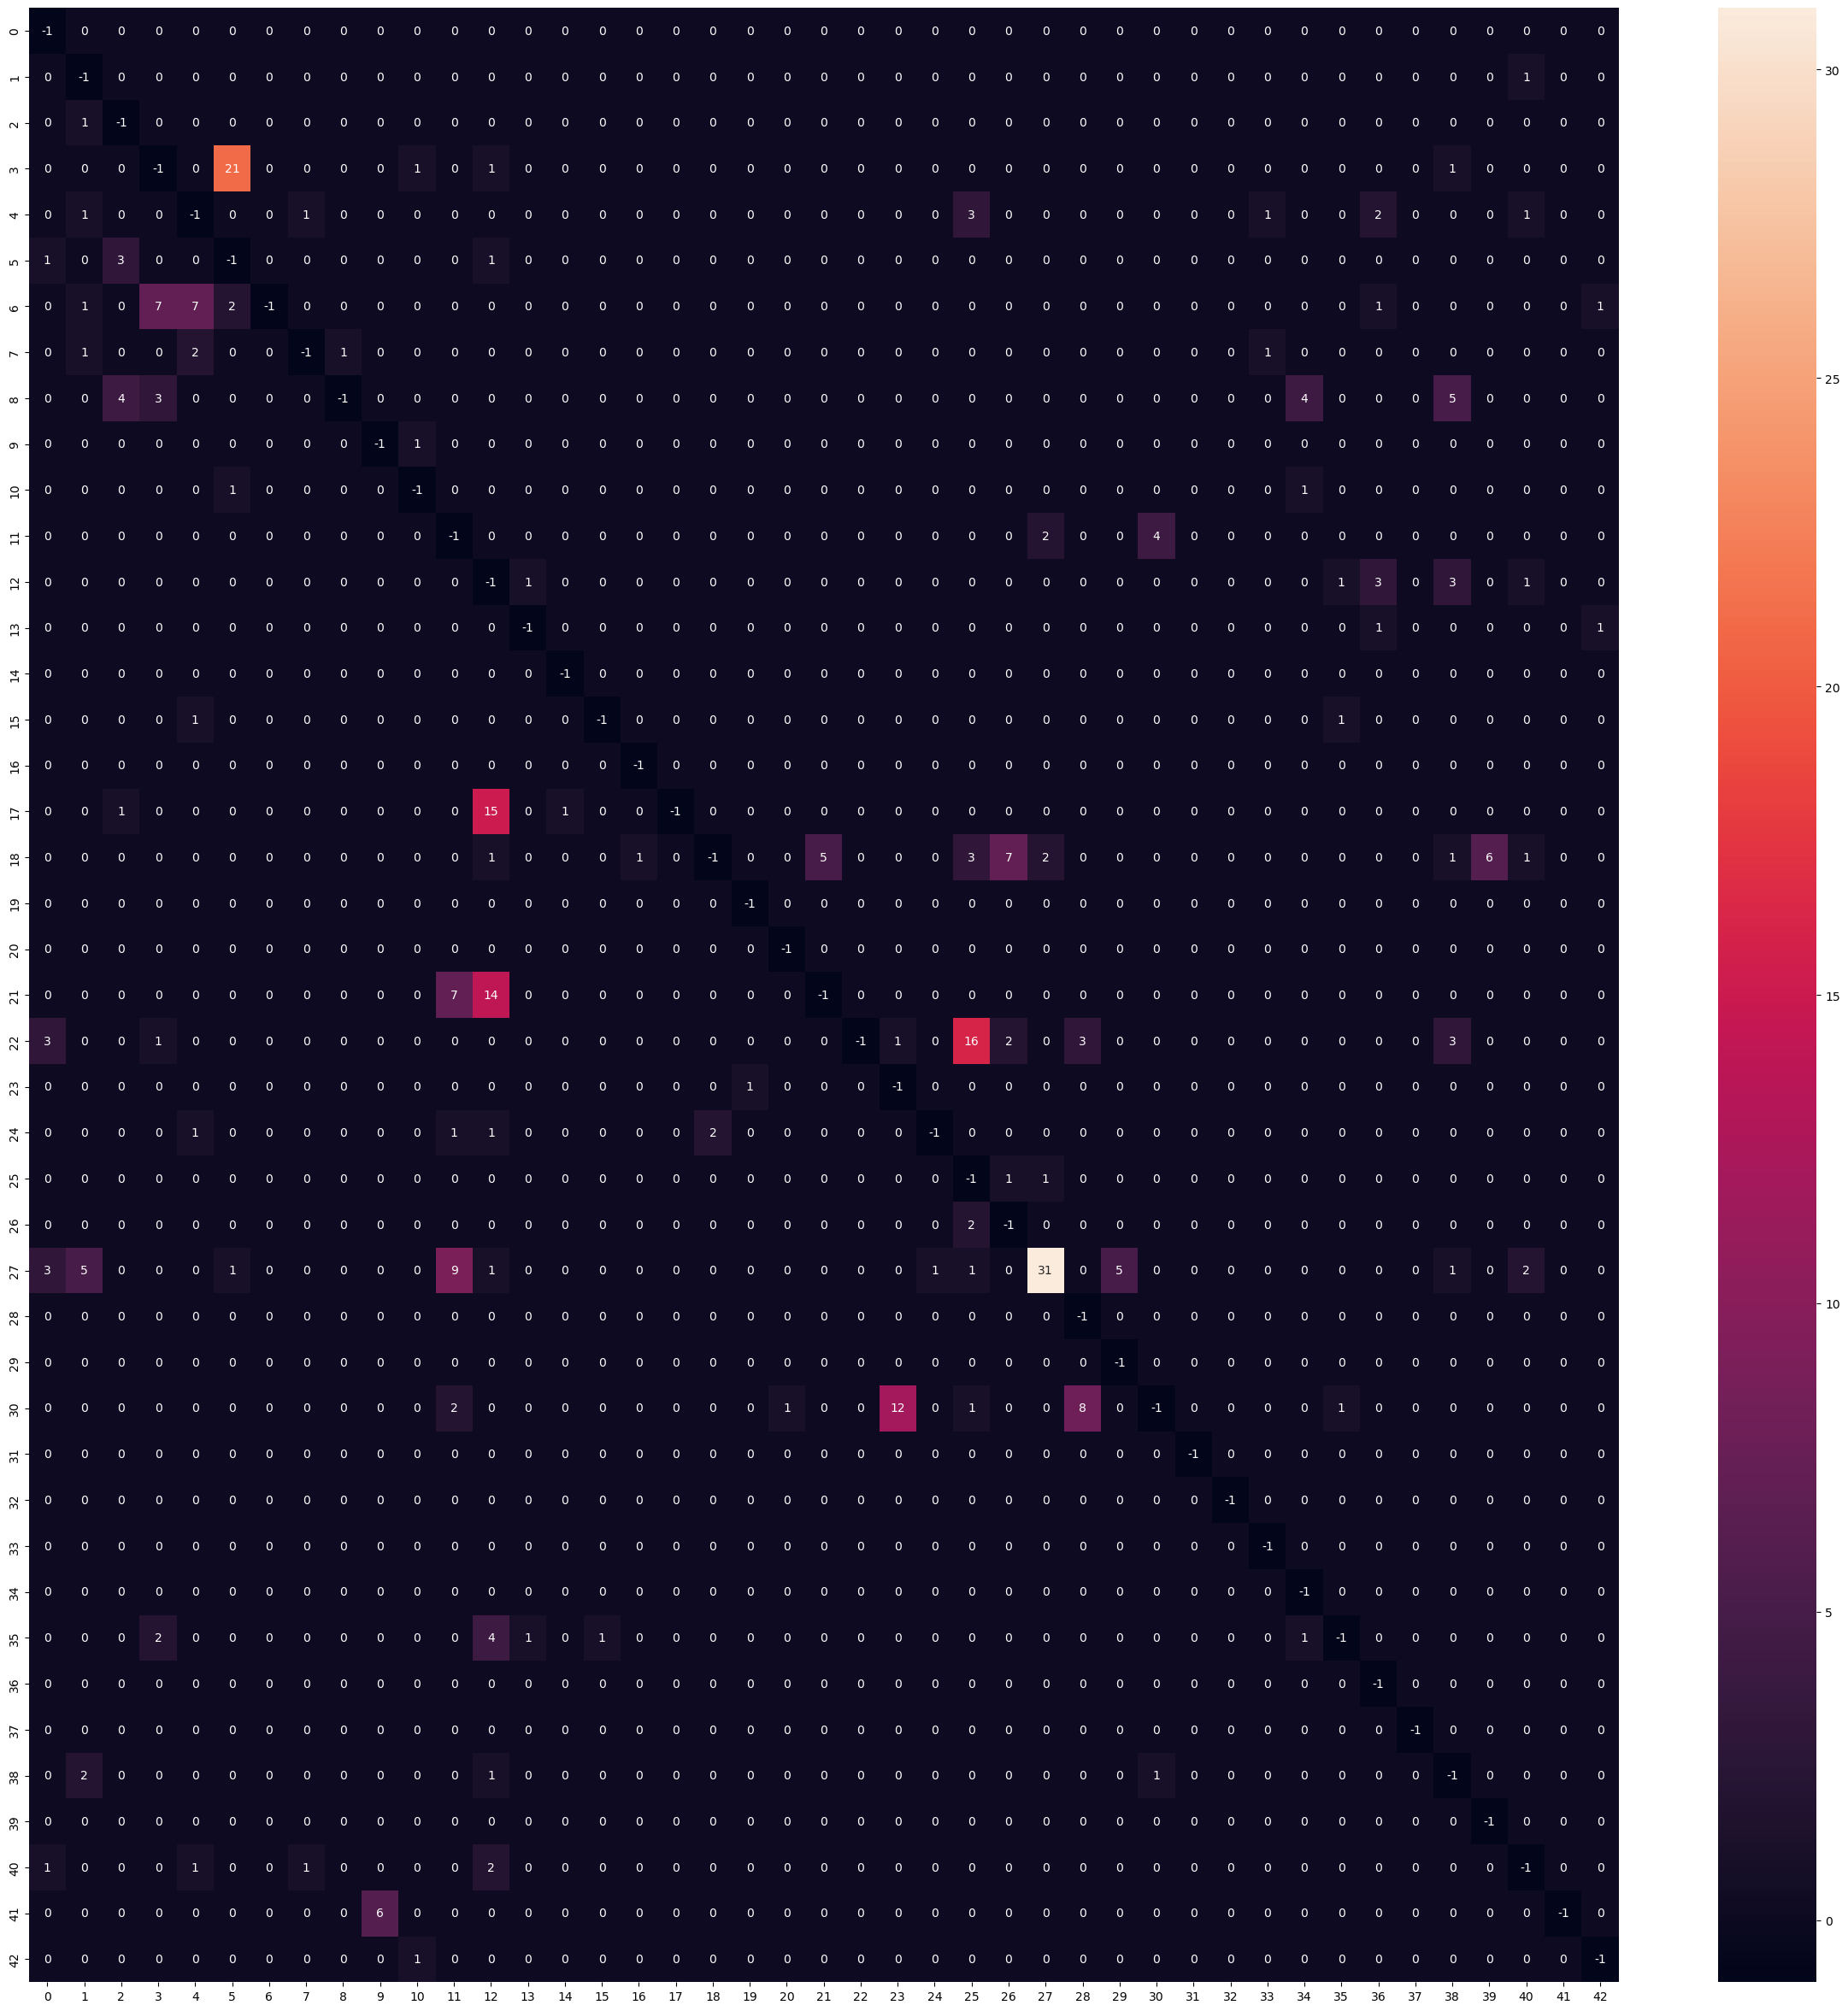

In [193]:
predicted_classes = np.argmax(predict_x, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_unchanged, predicted_classes)
import seaborn as sn
cm2 = cm.copy()
cm2[cm2 > 50] = -1
plt.figure(figsize = (30,30))
sn.heatmap(cm2, annot=True)

In [213]:
import pandas as pd
True_positive = np.zeros(43)
for i in range(cm.shape[0]):
    True_positive[i] = cm[i][i]

sum_of_rows = np.sum(cm, axis = 0)

incorrect_predictions = sum_of_rows - True_positive
inc_pred = list(incorrect_predictions)
lab = []
for i in range(len(inc_pred)):
    lab.append(classes[i])
final_df = pd.DataFrame({'class' : lab, 'Number of incorrect predictions': inc_pred})
final_df = final_df.sort_values(by = 'Number of incorrect predictions', ascending = False)
final_df['Number of incorrect predictions'] = final_df['Number of incorrect predictions'].astype(int)
final_df

,class,Number of incorrect predictions
12,Priority road,41
25,Road work,26
5,Speed limit (80km/h),25
11,Right-of-way at the next intersection,19
38,Keep right,14
23,Slippery road,13
3,Speed limit (60km/h),13
4,Speed limit (70km/h),12
28,Children crossing,11
1,Speed limit (30km/h),11


Part 8

In [66]:
#testing the model on brand new data
model.evaluate(new_X_test, new_y_test)

3/3 [==============================] - 0s 41ms/step - loss: 1.7287 - accuracy: 0.5714


[1.7287391424179077, 0.5714285969734192]

# Bonus

In [67]:
import torch
torch.manual_seed(0)
import torchvision
from torchvision import transforms
import torchvision.models as models
from IPython.display import display
import PIL
import ast
import cv2


In [68]:
classes_file = open("traffic_classes.txt", "r")
classes = ast.literal_eval(classes_file.read())
classes_file.close()
print(classes)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left'

In [163]:
img = X_test_gray_norm[4]
img = img.reshape(1,  32, 32, 1)
output = model(img)
top_prediction = np.argmax(output)
predicted_class = classes[top_prediction]
print(predicted_class)

Right-of-way at the next intersection


In [164]:
loss_function = torch.nn.MSELoss()

def generate_area_importance_heatmap_with_occlusions(image, annotation, block_size=14):
    image = np.array(image)
    
    height, width, channels = image.shape
    
    columns = width // block_size
    rows =  height // block_size
    
    heatmap = np.zeros((columns, rows))
    
    for row in range(rows):
        for column in range(columns):
            x = column*block_size
            y = row*block_size
            
            top = int(y)
            left = int(x)
            right = left+block_size
            bottom = top+block_size
            
            tmp_image = np.copy(image)
            tmp_image = tmp_image.astype(np.uint8)
            noise = np.random.rand(block_size, block_size, 1)
            tmp_image[int(top):int(bottom), int(left):int(right)] = noise
            tmp_image = tmp_image.reshape(1,32,32,1)
            prediction = model(tmp_image*255)
            prediction = tensorflow.convert_to_tensor(prediction, dtype=tensorflow.float32)
            loss = round(float(loss_function(prediction, annotation)), 4)
            
            heatmap[column, row] = loss

    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    heatmap = np.clip(heatmap, 0, 1)
    heatmap = heatmap * 255
    heatmap = np.uint8(heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    heatmap = cv2.resize(heatmap, (width, height), interpolation=cv2.INTER_NEAREST)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    overlayed = cv2.addWeighted(image, 1, heatmap, 0.75, 0)
    combined = np.concatenate((image, heatmap, overlayed), axis=1)
    
    return combined

In [165]:
output = model(img)
img = img.reshape(32,32,1)
occlusion_importance_heatmap = generate_area_importance_heatmap_with_occlusions(np.array(img), output)
display(PIL.Image.fromarray(occlusion_importance_heatmap))

AttributeError: 
        'EagerTensor' object has no attribute 'size'.
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()

In [1]:
!pip install streamlit


     ---------------------------------------- 9.6/9.6 MB 16.2 MB/s eta 0:00:00
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
     --------------------------------------- 20.6/20.6 MB 32.7 MB/s eta 0:00:00
     ---------------------------------------- 238.7/238.7 kB ? eta 0:00:00
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.7/4.7 MB 37.5 MB/s eta 0:00:00
     ------------------------------------- 813.6/813.6 kB 25.9 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB ? eta 0:00:00
     ---------------------------------------- 184.3/184.3 kB ? eta 0:00:00
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 35.9 MB/s eta